In [30]:
import pandas as pd
import numpy as np
from nltk.text import Text
import nltk

In [2]:
f = open('KJV.txt','r')
bible_text = f.read()
bible_text[:1000]

"\ufeffThe Project Gutenberg EBook of The King James Bible\n\n\n**********************************************************************\nEBOOK (#10) WAS ONE OF PROJECT GUTENBERG'S EARLY FILES PRODUCED AT A\nTIME WHEN PROOFING METHODS AND TOOLS WERE NOT WELL DEVELOPED. THERE IS\nAN IMPROVED EDITION OF THIS TITLE WHICH MAY VIEWED AT EBOOK http://www.gutenberg.org/files/10900/10900-h/10900-h.htm\n(There is no text file for this ebook)\n**********************************************************************\n\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: The King James Bible\n\nRelease Date: March 2, 2011 [EBook #10]\n[This King James Bible was orginally posted by Project Gutenberg\nin late 1989]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK THE KING JA

In [3]:
bible_books = ['Genesis', 'Exodus', 'Leviticus','Numbers','Deuteronomy', 'Joshua',
                 'Judges', 'Ruth', '1 Samuel', '2 Samuel', '1 Kings', '2 Kings',
                 '1 Chronicles', '2 Chronicles', 'Ezra', 'Nehemiah', 'Esther', 'Job',
                  'Psalms','Proverbs', 'Ecclesiastes', 'Song of Songs', 'Isaiah', 'Jeremiah',
                  'Lamentations','Ezekiel', 'Daniel', 'Hosea', 'Joel', 'Amos',
                  'Obadiah', 'Jonah', 'Micah', 'Nahum', 'Habbakkuk', 'Zephaniah',
                  'Haggai', 'Zechariah', 'Malachi', 'Matthew', 'Mark', 'Luke',
                  'John','Acs', 'Romans', '1 Corinthians', '2 Corinthians', 'Galatians',
                  'Ephesians','Philippians', 'Colossians', '1 Thessalonians', '2 Thessalonians', '1 Timothy',
                  '2 Timothy','Titus', 'Philemon', 'Hebrews', 'James', '1 Peter',
                  '2 Peter','1 John', '2 John', '3 John', 'Jude', 'Revelation']

In [4]:
book_in_bible = [book in bible_text for book in bible_books]
pd.concat([pd.Series(bible_books), pd.Series(book_in_bible)], axis =1).head(20)

0      1
0        Genesis   True
1         Exodus   True
2      Leviticus   True
3        Numbers   True
4    Deuteronomy   True
5         Joshua   True
6         Judges   True
7           Ruth   True
8       1 Samuel   True
9       2 Samuel  False
10       1 Kings   True
11       2 Kings   True
12  1 Chronicles  False
13  2 Chronicles  False
14          Ezra   True
15      Nehemiah   True
16        Esther   True
17           Job   True
18        Psalms   True
19      Proverbs   True

In [5]:
positions = [bible_text.find(book) for book in bible_books]
positions

[1090,
 207739,
 384862,
 517103,
 700707,
 277963,
 774591,
 1059638,
 1131104,
 -1,
 2309361,
 2170690,
 -1,
 -1,
 1342710,
 1839010,
 1938151,
 33793,
 2070262,
 2311144,
 2396887,
 -1,
 1541863,
 1566109,
 2875341,
 2894351,
 1585241,
 3171691,
 1099080,
 3211057,
 1418599,
 1517912,
 1034317,
 3261187,
 -1,
 1573415,
 1852281,
 1593078,
 3325504,
 3335086,
 1258725,
 3549640,
 3341287,
 -1,
 3750078,
 -1,
 -1,
 4069171,
 3886566,
 4103400,
 4115570,
 -1,
 -1,
 -1,
 -1,
 4040329,
 4171287,
 159299,
 41,
 3794334,
 -1,
 -1,
 -1,
 -1,
 1853497,
 4269040]

While the name of most of the books in the bible may be located in the text, but their occurences don't seem to always align with the start of the book. This is easy to see because the positions of each of the words are not in ascending order. I could split the text manually but I wonder if there is a way to do so more intelligently...

But let's have a look at some of the locations of the words.

In [6]:
snippets = []
for position in positions:
    if position != -1:
        snippet = bible_text[position-30:position+30]
    else:
        snippet = ''
    snippets.append(snippet)
snippets

[' First Book of Moses:  Called Genesis\n\n\n1:1 In the beginning',
 'Second Book of Moses:  Called Exodus\n\n\n1:1 Now these are the',
 ' Third Book of Moses:  Called Leviticus\n\n\n1:1 And the LORD c',
 'Fourth Book of Moses:  Called Numbers\n\n\n1:1 And the LORD spa',
 ' Fifth Book of Moses:  Called Deuteronomy\n\n\n1:1 These be the',
 'im.\n\n17:9 And Moses said unto Joshua, Choose us out men, and',
 'ch he hath given thee.\n\n16:18 Judges and officers shalt thou',
 'his own eyes.\n\n\n\n\nThe Book of Ruth\n\n\n1:1 Now it came to pass',
 'an, he took\nhim unto him.\n\n15:1 Samuel also said unto Saul, ',
 '',
 'hings, and flying fowl:\n\n148:11 Kings of the earth, and all ',
 'those that\npublished it.\n\n68:12 Kings of armies did flee apa',
 '',
 '',
 ' than all men; than Ethan the Ezrahite, and\nHeman, and Chalc',
 'came with\nZerubbabel: Jeshua, Nehemiah, Seraiah, Reelaiah, M',
 'od, for good.\n\n\n\n\nThe Book of Esther\n\n\n1:1 Now it came to pa',
 '9 And Ophir, and Havilah, an

While locating the book name works in most cases, in some cases it ends up picking a false positive. One thing we can do is look at the text immediately preceeding the first verse of each book. The first verse of each book will have a standard format so that should be easy

In [7]:
#Extracting verses
import re

surrounding_texts = []

for match in re.finditer("\n1:1 ", bible_text):
    surrounding_text = bible_text[match.start()-90:match.end()]
    surrounding_texts.append(surrounding_text)

surrounding_texts



['ment of the King James Version of the Bible\n\n\n\n\nThe First Book of Moses:  Called Genesis\n\n\n1:1 ',
 'd him, and he was put in a coffin in Egypt.\n\n\n\n\nThe Second Book of Moses:  Called Exodus\n\n\n1:1 ',
 'of Israel,\nthroughout all their journeys.\n\n\n\n\nThe Third Book of Moses:  Called Leviticus\n\n\n1:1 ',
 'for\nthe children of Israel in mount Sinai.\n\n\n\n\nThe Fourth Book of Moses:  Called Numbers\n\n\n1:1 ',
 '\nplains of Moab by Jordan near Jericho.\n\n\n\n\nThe Fifth Book of Moses:  Called Deuteronomy\n\n\n1:1 ',
 'l the great terror which Moses shewed\nin the sight of all Israel.\n\n\n\n\nThe Book of Joshua\n\n\n1:1 ',
 'tained to Phinehas his son, which was given him in mount\nEphraim.\n\n\n\n\nThe Book of Judges\n\n\n1:1 ',
 'king in Israel: every man did that\nwhich was right in his own eyes.\n\n\n\n\nThe Book of Ruth\n\n\n1:1 ',
 'egat David.\n\n\n\n\nThe First Book of Samuel\n\nOtherwise Called:\n\nThe First Book of the Kings\n\n\n1:1 ',
 'ven days.\n\n\n\

The title of each book is preceeded by five newline characters ('\n') and is followed by three newline characters. We can use positive look arounds to extract the text in the middle. 

In [8]:
pattern = '(?<=\n\n\n\n\n)(.+)(?=\n\n\n)'
book_names = re.findall(pattern,bible_text)
book_names

['The Old Testament of the King James Version of the Bible',
 'The First Book of Moses:  Called Genesis',
 'The Second Book of Moses:  Called Exodus',
 'The Third Book of Moses:  Called Leviticus',
 'The Fourth Book of Moses:  Called Numbers',
 'The Fifth Book of Moses:  Called Deuteronomy',
 'The Book of Joshua',
 'The Book of Judges',
 'The Book of Ruth',
 'The First Book of the Chronicles',
 'The Second Book of the Chronicles',
 'Ezra',
 'The Book of Nehemiah',
 'The Book of Esther',
 'The Book of Job',
 'The Book of Psalms',
 'The Proverbs',
 'The Song of Solomon',
 'The Book of the Prophet Isaiah',
 'The Book of the Prophet Jeremiah',
 'The Lamentations of Jeremiah',
 'The Book of the Prophet Ezekiel',
 'The Book of Daniel',
 'Hosea',
 'Joel',
 'Amos',
 'Obadiah',
 'Jonah',
 'Micah',
 'Nahum',
 'Habakkuk',
 'Zephaniah',
 'Haggai',
 'Zechariah',
 'Malachi',
 'The New Testament of the King James Bible',
 'The Gospel According to Saint Matthew',
 'The Gospel According to Saint Mark',

Ok, looks mostly good so far. Let's check the length.

In [9]:
len(book_names)

63

Uh oh! Looks like we're missing some. Upon closer inspection we're missing the books of 1,2 Samuel, 1,2 Kings and Ecclesiastes. These are formatted slightly differently with new line characters in the title as well. We can use a more complicated regex to extract these books as well

In [10]:
#pattern = '(?<=\n\n\n\n\n)(.+?\n?\n?\n?.*?\n?\n?.*)(?=\n\n\n)'
pattern = '(?<=\n\n\n\n\n)(.+?\n?\n?.*?\n?\n?.*)(?=\n\n\n)'
book_names = re.findall(pattern,bible_text)
len(book_names)

68

There are 66 books in the bible with two additional entries for the start of the Old and New Testament. We'll delete them from the list and our list of bible books should be complete.

In [11]:
del book_names [0], book_names[38]
book_names

['The First Book of Moses:  Called Genesis',
 'The Second Book of Moses:  Called Exodus',
 'The Third Book of Moses:  Called Leviticus',
 'The Fourth Book of Moses:  Called Numbers',
 'The Fifth Book of Moses:  Called Deuteronomy',
 'The Book of Joshua',
 'The Book of Judges',
 'The Book of Ruth',
 'The First Book of Samuel\n\nOtherwise Called:\n\nThe First Book of the Kings',
 'The Second Book of Samuel\n\nOtherwise Called:\n\nThe Second Book of the Kings',
 'The First Book of the Kings\n\nCommonly Called:\n\nThe Third Book of the Kings',
 'The Second Book of the Kings\n\nCommonly Called:\n\nThe Fourth Book of the Kings',
 'The First Book of the Chronicles',
 'The Second Book of the Chronicles',
 'Ezra',
 'The Book of Nehemiah',
 'The Book of Esther',
 'The Book of Job',
 'The Book of Psalms',
 'The Proverbs',
 'Ecclesiastes\n\nor\n\nThe Preacher',
 'The Song of Solomon',
 'The Book of the Prophet Isaiah',
 'The Book of the Prophet Jeremiah',
 'The Lamentations of Jeremiah',
 'The Boo

In [12]:
len(book_names)

66

Let's find the position of these book names so we can segment the rest of the bible text into the relevant books. Cutting off the book of Revelation will need special treatment as there is extra text trailing behind.

In [13]:
texts = []

for i in range(len(book_names)):
    start = bible_text.find(book_names[i])
    
    if i < len(book_names) - 1:
        end = bible_text.find(book_names[i+1])
        text = bible_text[start:end]
    else:
        end = bible_text.find('End of the Project Gutenberg EBook of The King James Bible\n\n***')
        text = bible_text[start:end]

    texts.append(text)

Our text is now in a form that is ready to be preprocessed. The first thing that we will do is to expand contractions. Let's pull up all words with an apostrophe present and list them out. Note I'm using the KJV text as a whole to do this ather than looping through the list of texts that I constructed before. This is out of convenience, I could loop through the list but I feel it is unnecessary.

In [14]:
contractions = re.findall('[a-zA-Z]+\'[a-zA-Z]+', bible_text)
pd.Series(contractions).unique()

array(["GUTENBERG'S", "wife's", "brother's", "Noah's", "man's",
       "father's", "another's", "Abram's", "Nahor's", "son's",
       "Pharaoh's", "Lot's", "king's", "their's", "Sarai's", "Abraham's",
       "forty's", "twenty's", "ten's", "servant's", "Abimelech's",
       "master's", "mother's", "sister's", "men's", "Sarah's", "Esau's",
       "Isaac's", "Jacob's", "God's", "well's", "Rebekah's", "Rachel's",
       "Leah's", "Laban's", "children's", "camel's", "Shechem's",
       "Hamor's", "our's", "Dinah's", "Ishmael's", "Lotan's", "Joseph's",
       "Judah's", "widow's", "woman's", "Egyptian's", "lord's", "guard's",
       "sack's", "Benjamin's", "lad's", "your's", "bed's", "Israel's",
       "Ephraim's", "Manasseh's", "lion's", "ass's", "river's", "child's",
       "Aaron's", "LORD's", "neighbour's", "eye's", "manservant's",
       "maidservant's", "tooth's", "enemy's", "priest's", "year's",
       "bullock's", "people's", "daughter's", "uncle's", "stranger's",
       "day's", "B

Interestingly enough, there don't seem to be any legitimate contractions. All uses of the apostrophe are used to indicate ownership. This makes things easy for us because we don't have to expand out any contractions.

Next we'll filter out stopwords using nltk. This will be slightly complicated because of the archaic language used in the KJV. The stopwords contained in the nltk pacakge will be missing a lot of terms that are no longer used. We can circumvent this by first looking at words which having an unusual frequency and add them to our list of stopwords.

In [15]:
bible_words = bible_text.split()
bible_words = pd.Series(bible_words)
word_counts = bible_words.value_counts()

In [16]:
word_counts

the            62257
and            38642
of             34553
to             13457
And            12735
that           12464
in             12222
shall           9762
he              9510
unto            8932
I               8708
his             8362
a               7999
for             7162
they            6895
be              6736
is              6722
with            5997
not             5859
all             5256
thou            4629
it              4471
thy             4451
was             4449
which           4275
my              4135
LORD            3930
their           3873
have            3825
will            3757
               ...  
Harnepher,         1
faileth;           1
distaff.           1
lendeth:           1
persuasion         1
produce            1
However,           1
Corinth;           1
Azgad;             1
thoughtest         1
teach.             1
136:16             1
refreshed:         1
islands;           1
fraud,             1
Clouds             1
45:26        

While the KJV was translated close to 400 years ago, it seems that many stop words are still in use today. Words such as thy and thou are antiquated, today we use your and you. Let's do some initial stop word removal and see what floats to the top. 

In [17]:
import nltk
stop_words = nltk.corpus.stopwords.words('english')

#Removing punctuation
doc = bible_text
doc = re.sub('[,:.;\?!]', '', doc)

#Lowering case
doc = doc.lower()

#Getting words
doc = doc.split()

filtered_words = [word for word in doc if word not in stop_words]
filtered_words = pd.Series(filtered_words)
filtered_counts = filtered_words.value_counts()
filtered_counts

shall              9840
unto               8997
lord               7828
thou               5473
thy                4600
god                4436
said               3998
ye                 3981
thee               3825
upon               2750
man                2612
israel             2563
son                2370
king               2264
hath               2264
people             2141
came               2093
house              2022
come               1971
one                1968
children           1801
also               1769
day                1731
land               1718
men                1651
shalt              1616
let                1510
go                 1492
hand               1466
us                 1449
                   ... 
foreordained          1
olympas               1
idumaea               1
zaphnathpaaneah       1
disposition           1
tiria                 1
1758                  1
weaken                1
5720                  1
1483                  1
3933            

Words such as thou, thy, ye, hath and thee will need to be added to our list of stop words.

In [18]:
stop_words.extend(['thou', 'thy', 'ye', 'hath', 'thee'])


Now let's apply this to the segmented list

In [19]:
processed_texts = []
for text in texts:
    text = re.sub('[,:.;\?!\d]', '', text)
    text = text.lower()
    text_words = text.split()
    filtered_text = [word for word in text_words if word not in stop_words]
    filtered_text = ' '.join(filtered_text)
    processed_texts.append(filtered_text)
    
processed_texts

["first book moses called genesis beginning god created heaven earth earth without form void darkness upon face deep spirit god moved upon face waters god said let light light god saw light good god divided light darkness god called light day darkness called night evening morning first day god said let firmament midst waters let divide waters waters god made firmament divided waters firmament waters firmament god called firmament heaven evening morning second day god said let waters heaven gathered together unto one place let dry land appear god called dry land earth gathering together waters called seas god saw good god said let earth bring forth grass herb yielding seed fruit tree yielding fruit kind whose seed upon earth earth brought forth grass herb yielding seed kind tree yielding fruit whose seed kind god saw good evening morning third day god said let lights firmament heaven divide day night let signs seasons days years let lights firmament heaven give light upon earth god made

Let's run the tfidf model and see if we can classify books based on their similarities.

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(processed_texts)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix,2), columns=vocab)

aaron  aaronites  abaddon  abagtha  abana  abarim  abase  abased  abasing  \
0    0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
1    0.15       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
2    0.11       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
3    0.13       0.00     0.00     0.00    0.0    0.01   0.00    0.00     0.00   
4    0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
5    0.01       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
6    0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
7    0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
8    0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
9    0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
10   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
11   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
12   0.03       0.01     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
13   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
14   0.01       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
15   0.01       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
16   0.00       0.00     0.00     0.01    0.0    0.00   0.00    0.00     0.00   
17   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
18   0.01       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
19   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
20   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
21   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
22   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
23   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
24   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
25   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
26   0.00       0.00     0.00     0.00    0.0    0.00   0.01    0.00     0.00   
27   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
28   0.01       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
29   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
..    ...        ...      ...      ...    ...     ...    ...     ...      ...   
36   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
37   0.01       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
38   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
39   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
40   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
41   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.01     0.00   
42   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
43   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
44   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
45   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
46   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.02   
47   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
48   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
49   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.03     0.00   
50   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
51   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
52   0.00       0.00     0.00     0.00    0.0    0.00   0.00    0.00     0.00   
53   0.00       0.00     0.00     0

In [85]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(np.round(similarity_matrix,2), columns = bible_books, index = bible_books)
pd.options.display.max_rows = 66
pd.options.display.max_columns = 66
similarity_df

Genesis  Exodus  Leviticus  Numbers  Deuteronomy  Joshua  \
Genesis             1.00    0.62       0.42     0.53         0.63    0.47   
Exodus              0.62    1.00       0.65     0.75         0.74    0.53   
Leviticus           0.42    0.65       1.00     0.75         0.57    0.38   
Numbers             0.53    0.75       0.75     1.00         0.58    0.61   
Deuteronomy         0.63    0.74       0.57     0.58         1.00    0.48   
Joshua              0.47    0.53       0.38     0.61         0.48    1.00   
Judges              0.65    0.58       0.37     0.58         0.53    0.61   
Ruth                0.50    0.41       0.24     0.32         0.44    0.29   
1 Samuel            0.52    0.48       0.32     0.43         0.47    0.41   
2 Samuel            0.54    0.47       0.29     0.41         0.48    0.44   
1 Kings             0.60    0.59       0.39     0.52         0.59    0.52   
2 Kings             0.56    0.52       0.36     0.49         0.50    0.52   
1 Chronicles        0.45    0.37       0.24     0.45         0.34    0.41   
2 Chronicles        0.00    0.00       0.00     0.00         0.00    0.00   
Ezra                0.60    0.58       0.39     0.58         0.56    0.58   
Nehemiah            0.49    0.45       0.29     0.48         0.43    0.46   
Esther              0.22    0.19       0.13     0.18         0.16    0.22   
Job                 0.55    0.59       0.50     0.46         0.66    0.32   
Psalms              0.56    0.63       0.51     0.50         0.84    0.41   
Proverbs            0.39    0.46       0.48     0.41         0.55    0.26   
Ecclesiastes        0.36    0.35       0.34     0.29         0.42    0.21   
Song of Songs       0.31    0.30       0.18     0.20         0.42    0.15   
Isaiah              0.53    0.67       0.74     0.63         0.75    0.43   
Jeremiah            0.56    0.64       0.58     0.60         0.70    0.52   
Lamentations        0.37    0.41       0.30     0.34         0.48    0.32   
Ezekiel             0.59    0.72       0.69     0.65         0.77    0.49   
Daniel              0.44    0.47       0.48     0.43         0.48    0.35   
Hosea               0.00    0.00       0.00     0.00         0.00    0.00   
Joel                0.69    0.74       0.62     0.67         0.80    0.58   
Amos                0.00    0.00       0.00     0.00         0.00    0.00   
Obadiah             0.62    0.54       0.35     0.49         0.52    0.50   
Jonah               0.00    0.00       0.00     0.00         0.00    0.00   
Micah               0.70    0.74       0.62     0.68         0.80    0.59   
Nahum               0.35    0.43       0.47     0.36         0.58    0.23   
Habbakkuk           0.00    0.00       0.00     0.00         0.00    0.00   
Zephaniah           0.53    0.51       0.35     0.56         0.48    0.55   
Haggai              0.00    0.00       0.00     0.00         0.00    0.00   
Zechariah           0.65    0.74       0.67     0.68         0.82    0.56   
Malachi             0.01    0.00       0.00     0.00         0.00    0.03   
Matthew             0.63    0.57       0.52     0.55         0.58    0.45   
Mark                0.59    0.52       0.46     0.49         0.50    0.42   
Luke                0.70    0.60       0.49     0.56         0.60    0.48   
John                0.54    0.45       0.35     0.41         0.45    0.36   
Acs                 0.56    0.47       0.33     0.43         0.47    0.42   
Romans              0.39    0.41       0.37     0.36         0.48    0.30   
1 Corinthians       0.36    0.39       0.38     0.38         0.43    0.31   
2 Corinthians       0.31    0.29       0.28     0.29         0.33    0.27   
Galatians           0.29    0.26       0.25     0.27         0.29    0.24   
Ephesians           0.29    0.29       0.26     0.30         0.32    0.28   
Philippians         0.23    0.23       0.23     0.23         0.25    0.20   
Colossians          0.26    0.25       0.25     0.26         0.29    0.24   
1 Thessalonia

In [66]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')



Document\Cluster 1 Document\Cluster 2   Distance Cluster Size
0                  13                 27          0            2
1                  29                 66          0            3
2                  31                 67          0            4
3                  34                 68          0            5
4                  36                 69          0            6
5                  28                 32  0.0280751            2
6                  11                 30   0.285225            2
7                  39                 41   0.308743            2
8                  22                 25   0.363769            2
9                   4                 18   0.367941            2
10                 37                 71   0.391338            3
11                 10                 14   0.415581            2
12                 48                 50   0.440958            2
13                 40                 73   0.462883            3
14                 44                 45   0.483222            2
15                 46                 51   0.520181            2
16                 59                 81   0.551544            3
17                  8                  9   0.556399            2
18                  1                  3   0.566255            2
19                 23                 74   0.575194            3
20                 49                 78   0.586349            3
21                  0                  6   0.629717            2
22                 35                 77   0.629961            3
23                 42                 43    0.63032            2
24                 47                 86   0.639303            4
25                 52                 82    0.74681            4
26                 19                 20   0.758679            2
27                 17                 75   0.784835            3
28                 72                 88    0.78816            5
29                 90                 91   0.823091            8
..                ...                ...        ...          ...
35                 85                 93    0.93773            6
36                 79                 89   0.967735            5
37                 26                 65     1.0128            2
38                 61                 62    1.03058            2
39                 58                 99     1.0337            3
40                 12                 96    1.05342            3
41                 24                 33    1.12368            2
42                 83                 87    1.13997            4
43                 56                 64    1.18866            2
44                 92                103    1.20997            4
45                 21                 63    1.23385            2
46                 98                109    1.23881            4
47                 97                105    1.26434            6
48                107                110    1.32684            6
49                104                112    1.32808            6
50                 38                 70    1.36072            7
51                 94                108    1.39813            9
52                  7                106    1.44202            4
53                100                101    1.55439            9
54                 16                111    1.62981            3
55                 95                113    1.81166           14
56                117                118    2.09101           13
57                 76                119    2.11957           12
58                115                120    2.49733            9
59                102                123     3.2138           17
60                114                122    3.35685           19
61                125                126    3.98504           36
62                121                124    4.14123           23
63                116                128    8.77593           30
64                127                1

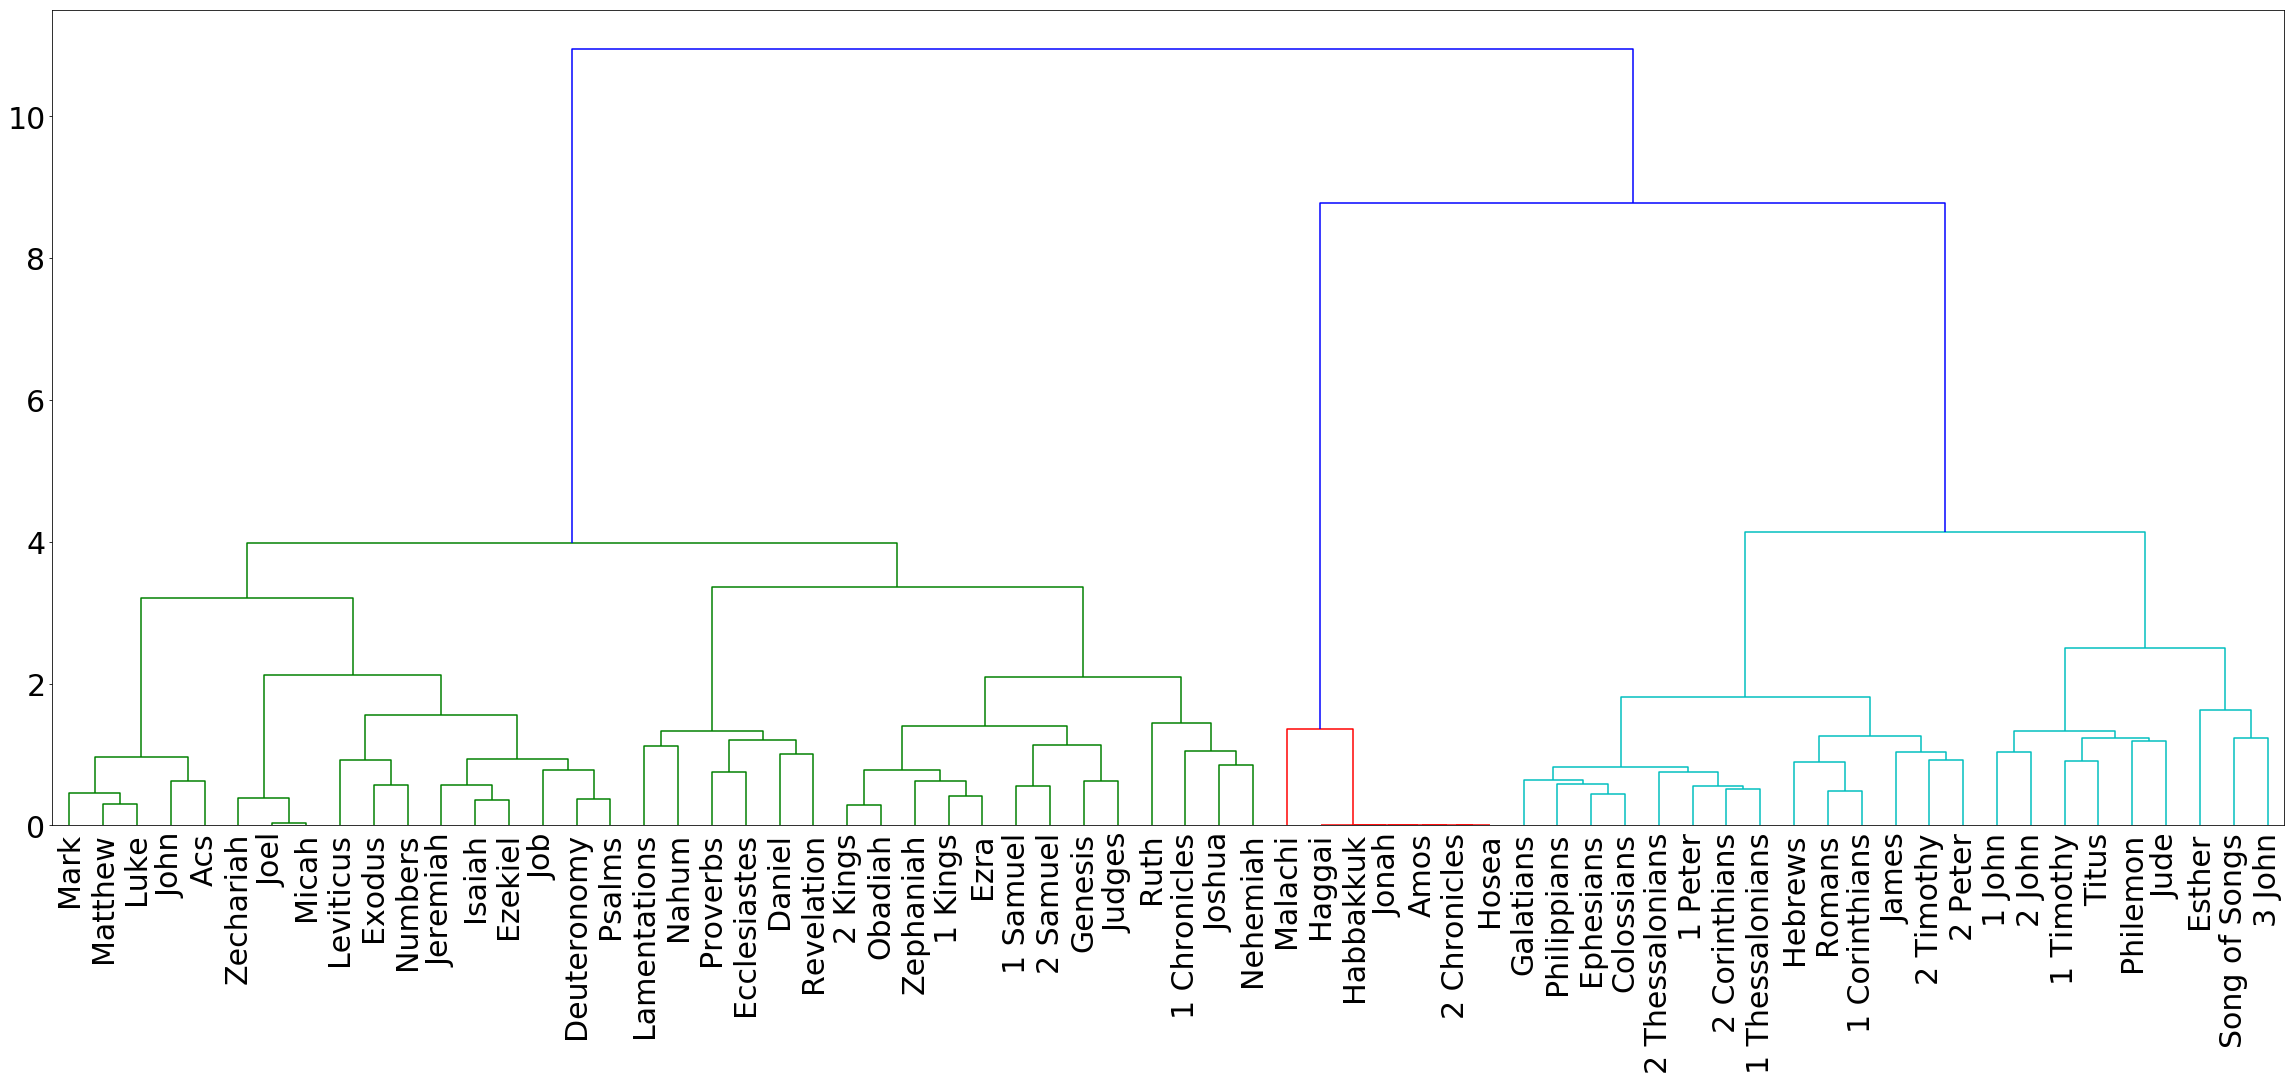

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 15))
#plt.title('Hierarchical Clustering Dendrogram')
#plt.xlabel('Data point')
#plt.ylabel('Distance')
dendrogram(Z, labels = bible_books)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig("figure.png")

In [36]:
bible_text = Text(nltk.word_tokenize(' '.join(processed_texts)))
bible_text

<Text: first book moses called genesis beginning god created...>

In [40]:
bible_text.concordance("justification")
bible_text.similar("peace")

Displaying 3 of 3 matches:
d dead delivered offences raised justification therefore justified faith peace 
ion free gift many offences unto justification one man 's offence death reigned
one free gift came upon men unto justification life one man 's disobedience man
unto lord god shall said jerusalem saying man went burnt israel us
therefore go come speak upon day give name


In [48]:
len(bible_text)

910530

In [29]:
processed_texts[0]

"first book moses called genesis beginning god created heaven earth earth without form void darkness upon face deep spirit god moved upon face waters god said let light light god saw light good god divided light darkness god called light day darkness called night evening morning first day god said let firmament midst waters let divide waters waters god made firmament divided waters firmament waters firmament god called firmament heaven evening morning second day god said let waters heaven gathered together unto one place let dry land appear god called dry land earth gathering together waters called seas god saw good god said let earth bring forth grass herb yielding seed fruit tree yielding fruit kind whose seed upon earth earth brought forth grass herb yielding seed kind tree yielding fruit whose seed kind god saw good evening morning third day god said let lights firmament heaven divide day night let signs seasons days years let lights firmament heaven give light upon earth god made 